In [20]:
import pandas as pd
import numpy as np
import sqlite3
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score


In [2]:
# Connect to database and load data
conn = sqlite3.connect("database/database/german_credit.db")
df = pd.read_sql("SELECT * FROM cleaned_credit_data;", conn)

# Separate targets
y_log = df["Credit_risk"]
y_lin = df["Credit_amount"]
X = df.drop(columns=["Credit_risk", "Credit_amount"])


In [3]:
X_log = sm.add_constant(X)
X_lin = sm.add_constant(X)

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIFs
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_df.sort_values(by="VIF", ascending=False)

,feature,VIF
43,Job_A173,30.007212
10,Credit_history_A32,13.026247
31,Personal_status_and_sex_A93,10.651862
42,Job_A172,10.242745
27,Present_employment_since_A73,9.182793
12,Credit_history_A34,7.681249
39,Other_installment_plans_A143,7.242972
44,Job_A174,7.095348
29,Present_employment_since_A75,6.860415
30,Personal_status_and_sex_A92,6.130421


In [5]:
logit_model = sm.Logit(y_log, X_log)
logit_result = logit_model.fit()

# Summary
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.452138
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            Credit_risk   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      952
Method:                           MLE   Df Model:                           47
Date:                Mon, 21 Jul 2025   Pseudo R-squ.:                  0.2598
Time:                        15:54:01   Log-Likelihood:                -452.14
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 8.267e-42
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const           

In [6]:
params = logit_result.params
conf = logit_result.conf_int()
conf["OR"] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
conf["Odds_Ratio"] = np.exp(conf["OR"])
conf


,Lower CI,Upper CI,OR,Odds_Ratio
const,-4.222449,-0.699228,-2.460839,0.085363
Duration_in_month,-0.702582,-0.338769,-0.520675,0.594119
Installment_rate_in_percentage_of_disposable_income,-0.422997,-0.075663,-0.249330,0.779323
Present_residence_since,-0.182633,0.189091,0.003229,1.003234
Age_in_years,-0.043045,0.364730,0.160843,1.174500
Number_of_existing_credits_at_this_bank,-0.379666,0.048000,-0.165833,0.847188
Number_of_people_being_liable_to_provide_maintenance_for,-0.259958,0.093021,-0.083469,0.919920
Status_of_existing_checking_account_A12,-0.088424,0.758009,0.334793,1.397651
Status_of_existing_checking_account_A13,0.289739,1.731148,1.010444,2.746819
Status_of_existing_checking_account_A14,1.228000,2.130101,1.679050,5.360462


In [8]:
from scipy.stats import chi2
from sklearn.utils import resample

def hosmer_lemeshow(y_true, y_pred, g=10):
    df = pd.DataFrame({"y": y_true, "prob": y_pred})
    df["group"] = pd.qcut(df["prob"], g)
    observed = df.groupby("group")["y"].agg(["sum", "count"])
    expected = df.groupby("group")["prob"].sum()
    hl_stat = np.sum((observed["sum"] - expected)**2 / (expected * (1 - expected / observed["count"])))
    df_hl = g - 2
    p_value = 1 - chi2.cdf(hl_stat, df_hl)
    return hl_stat, p_value

hl_stat, hl_p = hosmer_lemeshow(y_log, y_pred_prob)
print(f"Hosmer-Lemeshow Test: Statistic = {hl_stat:.3f}, p-value = {hl_p:.3f}")

Hosmer-Lemeshow Test: Statistic = 7.448, p-value = 0.489


In [9]:
ols_model = sm.OLS(y_lin, X_lin)
ols_result = ols_model.fit()

print(ols_result.summary())


                            OLS Regression Results                            
Dep. Variable:          Credit_amount   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     31.40
Date:                Mon, 21 Jul 2025   Prob (F-statistic):          2.30e-160
Time:                        15:55:36   Log-Likelihood:                -950.82
No. Observations:                1000   AIC:                             1998.
Df Residuals:                     952   BIC:                             2233.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

### Linear Regression

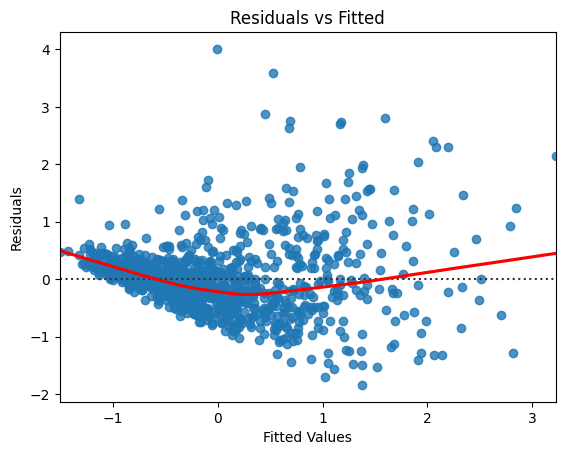

In [10]:
residuals = ols_result.resid
fitted = ols_result.fittedvalues

sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()


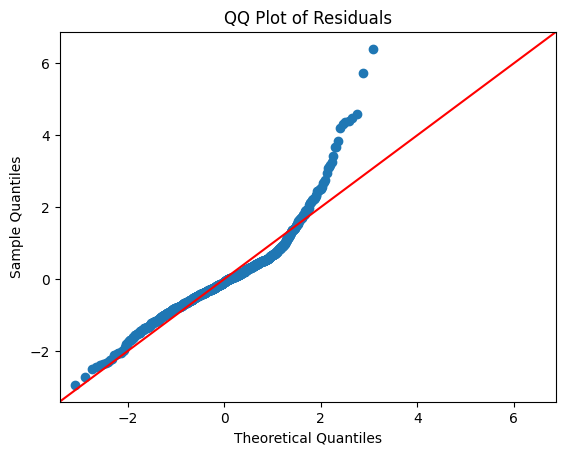

In [12]:
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.show()


In [13]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out = 0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=False)
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        # backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=False)
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [14]:
selected_features = stepwise_selection(X, y_log)
print("Selected features:", selected_features)


/tmp/ipykernel_114299/1519233538.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Status_of_existing_checking_account_A14 with p-value 9.7376e-22


/tmp/ipykernel_114299/1519233538.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Duration_in_month              with p-value 4.75158e-10


/tmp/ipykernel_114299/1519233538.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Credit_history_A34             with p-value 6.6137e-05


/tmp/ipykernel_114299/1519233538.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Savings_account_bonds_A65      with p-value 0.000509488


/tmp/ipykernel_114299/1519233538.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Purpose_A43                    with p-value 0.00344143


/tmp/ipykernel_114299/1519233538.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Purpose_A41                    with p-value 0.000590628


/tmp/ipykernel_114299/1519233538.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Installment_rate_in_percentage_of_disposable_income with p-value 0.00351152


/tmp/ipykernel_114299/1519233538.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Housing_A152                   with p-value 0.00375487


/tmp/ipykernel_114299/1519233538.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Other_installment_plans_A143   with p-value 0.00409675


/tmp/ipykernel_114299/1519233538.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Personal_status_and_sex_A93    with p-value 0.00527539


/tmp/ipykernel_114299/1519233538.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Selected features: ['Status_of_existing_checking_account_A14', 'Duration_in_month', 'Credit_history_A34', 'Savings_account_bonds_A65', 'Purpose_A43', 'Purpose_A41', 'Installment_rate_in_percentage_of_disposable_income', 'Housing_A152', 'Other_installment_plans_A143', 'Personal_status_and_sex_A93']


In [15]:
X_selected = X[selected_features]
X_selected = sm.add_constant(X_selected)

logit_selected = sm.Logit(y_log, X_selected)
logit_result_selected = logit_selected.fit()
print(logit_result_selected.summary())


Optimization terminated successfully.
         Current function value: 0.491239
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Credit_risk   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Mon, 21 Jul 2025   Pseudo R-squ.:                  0.1958
Time:                        16:09:08   Log-Likelihood:                -491.24
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 9.840e-46
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                     

In [16]:
# Stepwise-selected features from earlier
selected_features = [
    'Status_of_existing_checking_account_A14',
    'Duration_in_month',
    'Credit_history_A34',
    'Savings_account_bonds_A65',
    'Purpose_A43',
    'Purpose_A41',
    'Installment_rate_in_percentage_of_disposable_income',
    'Housing_A152',
    'Other_installment_plans_A143',
    'Personal_status_and_sex_A93'
]

# Subset X
X_reduced = sm.add_constant(X[selected_features])

# Fit reduced model
logit_reduced = sm.Logit(y_log, X_reduced)
result_reduced = logit_reduced.fit()


Optimization terminated successfully.
         Current function value: 0.491239
         Iterations 6


In [17]:
X_full = sm.add_constant(X)

logit_full = sm.Logit(y_log, X_full)
result_full = logit_full.fit()


Optimization terminated successfully.
         Current function value: 0.452138
         Iterations 7


In [18]:
print("🔍 Reduced Model Summary:")
print(result_reduced.summary())

print("\n🔍 Full Model Summary:")
print(result_full.summary())


🔍 Reduced Model Summary:
                           Logit Regression Results                           
Dep. Variable:            Credit_risk   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Mon, 21 Jul 2025   Pseudo R-squ.:                  0.1958
Time:                        16:12:03   Log-Likelihood:                -491.24
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 9.840e-46
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -1.1789      0.244     -4.839      0.000      -1

In [ ]:


# Predict probabilities
y_pred_reduced = result_reduced.predict(X_reduced)
y_pred_full = result_full.predict(X_full)

# AUC comparison
print("📈 AUC Scores:")
print("Reduced model:", roc_auc_score(y_log, y_pred_reduced))
print("Full model   :", roc_auc_score(y_log, y_pred_full))


📈 AUC Scores:
Reduced model: 0.7897380952380952
Full model   : 0.8289000000000001


In [22]:
coef_df = result_reduced.summary2().tables[1]
coef_df["Odds_Ratio"] = np.exp(coef_df["Coef."])
coef_df = coef_df[["Coef.", "P>|z|", "Odds_Ratio"]]
coef_df.sort_values(by="P>|z|", ascending=True)


,Coef.,P>|z|,Odds_Ratio
Status_of_existing_checking_account_A14,1.478071,4.060641e-15,4.384481
Duration_in_month,-0.518435,1.125467e-10,0.595452
const,-1.178927,1.304238e-06,0.307609
Credit_history_A34,0.725391,1.744935e-04,2.065539
Purpose_A43,0.694504,2.475454e-04,2.002716
Purpose_A41,1.107874,4.850004e-04,3.027914
Savings_account_bonds_A65,0.792776,7.863979e-04,2.209521
Installment_rate_in_percentage_of_disposable_income,-0.264240,1.236854e-03,0.767789
Other_installment_plans_A143,0.590511,1.896117e-03,1.804911
Housing_A152,0.495535,4.095041e-03,1.641376
